In [ ]:
# Import necessary libraries
import pandas_datareader as pdr  # For accessing data from external sources like Yahoo Finance
import numpy as np  # For numerical operations, especially on arrays and matrices
import matplotlib.pyplot as plt  # For creating visualizations and plotting data
import pandas as pd  # For data manipulation and analysis
import yfinance as yf  # For fetching stock data from Yahoo Finance


In [ ]:
start = "2021-04-04"
end = "2024-11-13"

stock='QUBT'

In [ ]:
data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,QUBT,QUBT,QUBT,QUBT,QUBT,QUBT
Date,,,,,,
2021-04-05 00:00:00+00:00,8.30,8.30,8.50,7.35,7.43,75800
2021-04-06 00:00:00+00:00,8.20,8.20,8.50,8.00,8.37,45900
2021-04-07 00:00:00+00:00,8.20,8.20,8.50,8.20,8.30,55000
2021-04-08 00:00:00+00:00,8.33,8.33,8.50,8.25,8.40,29800
2021-04-09 00:00:00+00:00,8.15,8.15,8.59,8.06,8.59,38100


In [5]:
# Reset the index of the DataFrame and select the 'Close' column
df1 = data.reset_index()['Close']  # 'data' should be a DataFrame containing stock data; reset_index() converts the index into a column

# Display the modified DataFrame
df1  # Shows only the 'Close' column, which represents the closing prices of the stock for each date


Ticker,QUBT
0,8.30
1,8.20
2,8.20
3,8.33
4,8.15
...,...
905,1.08
906,1.35
907,1.43
908,1.41


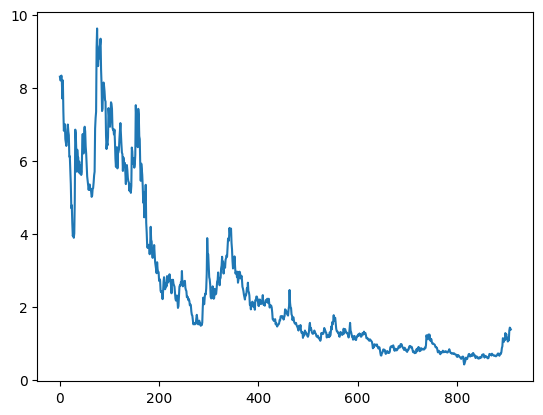

In [6]:
plt.plot(df1)

In [7]:
# Import the MinMaxScaler from scikit-learn for normalization
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object with a feature range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))  # Scales data to be within the range [0, 1]

# Normalize the 'Close' column using MinMaxScaler
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
# np.array(df1): Converts the 'Close' column into a NumPy array
# .reshape(-1, 1): Reshapes the array into a 2D format required by the scaler (n_samples, n_features)
# scaler.fit_transform(): Fits the scaler to the data and transforms it

# After this step, 'df1' contains the normalized values of the 'Close' column


In [8]:
df1.shape

(910, 1)

In [9]:
df1

array([[0.85650617],
       [0.84563538],
       [0.84563538],
       [0.85976737],
       [0.84019999],
       [0.79128165],
       [0.84563538],
       [0.7537776 ],
       [0.69561912],
       [0.70540275],
       [0.71518644],
       [0.6706164 ],
       [0.65974561],
       [0.65050552],
       [0.66083271],
       [0.69888031],
       [0.71409934],
       [0.69344497],
       [0.68257418],
       [0.61843681],
       [0.61952386],
       [0.57712796],
       [0.53690621],
       [0.46515924],
       [0.47385588],
       [0.4205892 ],
       [0.38254159],
       [0.38960758],
       [0.37710622],
       [0.39015113],
       [0.48907491],
       [0.69888031],
       [0.68692248],
       [0.63909123],
       [0.57386671],
       [0.63909123],
       [0.61626266],
       [0.61626266],
       [0.57277966],
       [0.60376128],
       [0.56843137],
       [0.57930211],
       [0.59343409],
       [0.56408307],
       [0.57386671],
       [0.64996197],
       [0.68583543],
       [0.628

In [10]:
training_data=int(len(df1)*0.75)
test_size=len(df1)-training_data
# The original line was causing the error because it was trying to access
# the second column (index 1) of df1, which has only one column.
# train_data,test_data= df1[0:training_data,],df1[training_data:len(df1),1]
# The corrected line below selects all columns (:) for the test_data split.
train_data,test_data= df1[0:training_data,:],df1[training_data:len(df1),:]

In [11]:
# Define a function to create a dataset for time series forecasting
def create_dataset(dataset, time_step=1):
    # Initialize two empty lists to store input sequences (dataX) and output values (dataY)
    dataX, dataY = [], []

    # Loop through the dataset to create sequences
    for i in range(len(dataset) - time_step - 1):
        # Extract a sequence of `time_step` values as input (dataX)
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)  # Append the sequence to dataX

        # The corresponding output (dataY) is the value immediately following the sequence
        dataY.append(dataset[i + time_step, 0])  # Append the next value to dataY

    # Convert the lists to NumPy arrays for easier handling in machine learning models
    return np.array(dataX), np.array(dataY)


In [12]:
# Set the number of time steps (sequence length) to use for each input sample
time_step = 100  # Using the last 100 data points to predict the next value

# Create test datasets using the `create_dataset` function
X_test, Y_test = create_dataset(test_data, time_step)
# `X_test` contains sequences of 100 time steps each from `test_data`
# `Y_test` contains the target values, the actual values following each sequence in `X_test`

# Create training datasets using the `create_dataset` function
X_train, Y_train = create_dataset(train_data, time_step)
# `X_train` and `Y_train` follow the same logic as above but are generated from `train_data`



In [13]:
print(X_train)

[[0.85650617 0.84563538 0.84563538 ... 0.67713884 0.76301773 0.74236331]
 [0.84563538 0.84563538 0.85976737 ... 0.76301773 0.74236331 0.71627354]
 [0.84563538 0.85976737 0.84019999 ... 0.74236331 0.71627354 0.7075769 ]
 ...
 [0.09446679 0.09446679 0.09011849 ... 0.0406566  0.04663551 0.04663551]
 [0.09446679 0.09011849 0.08903142 ... 0.04663551 0.04663551 0.04272204]
 [0.09011849 0.08903142 0.08033482 ... 0.04663551 0.04272204 0.04196108]]


In [14]:
# Print the shapes of the training and test datasets
print(X_train.shape, Y_train.shape)  # Prints the dimensions of the training input and output arrays
print(X_test.shape, Y_test.shape)    # Prints the dimensions of the test input and output arrays


(581, 100) (581,)
(127, 100) (127,)


In [15]:
# Reshape the training data to make it compatible with LSTM input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# Reshapes `X_train` to a 3D array with dimensions (samples, time steps, features)
# `X_train.shape[0]` is the number of samples, `X_train.shape[1]` is the time steps (e.g., 100),
# and `1` indicates one feature per time step (in this case, the stock price)

# Reshape the test data similarly
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Ensures `X_test` has the same 3D shape structure as `X_train`, matching LSTM input requirements


In [16]:
# Import the necessary modules to build and define a neural network model
from tensorflow.keras.models import Sequential  # For creating a sequential model, where layers are added one by one
from tensorflow.keras.layers import Dense  # For adding fully connected (dense) layers to the model
from tensorflow.keras.layers import LSTM  # For adding LSTM layers, commonly used in time series and sequence modeling


In [17]:
# Initialize the sequential model
model = Sequential()

# Add the first LSTM layer with 50 units
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
# `50` units: Number of neurons in this LSTM layer
# `return_sequences=True`: Ensures this layer returns the full sequence of outputs, required for stacking more LSTM layers
# `input_shape=(100, 1)`: Specifies the shape of each input sample (100 time steps, 1 feature)

# Add a second LSTM layer with 50 units
model.add(LSTM(50, return_sequences=True))
# `return_sequences=True`: Required to pass the sequence to the next LSTM layer

# Add a third LSTM layer with 50 units
model.add(LSTM(50))
# No `return_sequences` here since it's the last LSTM layer, and we only need the final output

# Add a Dense layer with 1 unit for the output
model.add(Dense(1))
# `Dense(1)`: This layer outputs a single value, ideal for regression tasks such as predicting stock prices

# Compile the model with mean squared error as the loss function and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')
# `loss='mean_squared_error'`: Measures how close predictions are to actual values; commonly used in regression
# `optimizer='adam'`: Adam is an adaptive learning rate optimizer suitable for most problems

# Display the model's architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=100, batch_size=32,verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 0.0328 - val_loss: 0.0025
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0039 - val_loss: 7.7547e-04
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0044 - val_loss: 8.1792e-04
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0024 - val_loss: 2.2752e-04
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0023 - val_loss: 3.7440e-04
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0023 - val_loss: 2.1628e-04
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - loss: 0.0021 - val_loss: 2.6969e-04
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0022 - val_loss: 2.8131e-04
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0020 - val_loss: 2.1890e-04
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0029 - val_loss: 2.5973e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0021 - val_loss: 1.7065e-04
E

In [21]:
# Predict the stock prices on the training data using the trained model
train_predict = model.predict(X_train)
# `X_train` is the input data for training, and `train_predict` will contain the predicted stock prices for each sample in `X_train`

# Predict the stock prices on the test data
test_predict = model.predict(X_test)
# `X_test` is the input data for testing, and `test_predict` will contain the predicted stock prices for each sample in `X_test`


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 793ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 740ms/step


In [22]:
# Inverse transform the predicted values to return them to their original scale (back to stock prices)
train_predict = scaler.inverse_transform(train_predict)
# `scaler.inverse_transform()` reverses the scaling transformation applied earlier, so `train_predict` returns to the original scale of stock prices

test_predict = scaler.inverse_transform(test_predict)
# Similarly, `test_predict` is transformed back to the original scale of stock prices


In [23]:
import math
from sklearn.metrics import mean_squared_error

# Calculate the Root Mean Squared Error (RMSE) for the training data
train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
# `mean_squared_error(Y_train, train_predict)`: Computes the Mean Squared Error (MSE) between the actual and predicted values for the training data
# `math.sqrt()` converts the MSE to RMSE, providing a measure of the standard deviation of the prediction errors

# Calculate the RMSE for the test data
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predict))
# `mean_squared_error(Y_test, test_predict)`: Computes the MSE between the actual and predicted values for the test data
# `math.sqrt()` converts the MSE to RMSE

# Print the RMSE values
print(f'train_rmse: {train_rmse}')  # Print the RMSE for the training data
print(f'test_rmse: {test_rmse}')    # Print the RMSE for the test data


train_rmse: 2.625062252464658
test_rmse: 0.6719155346011707


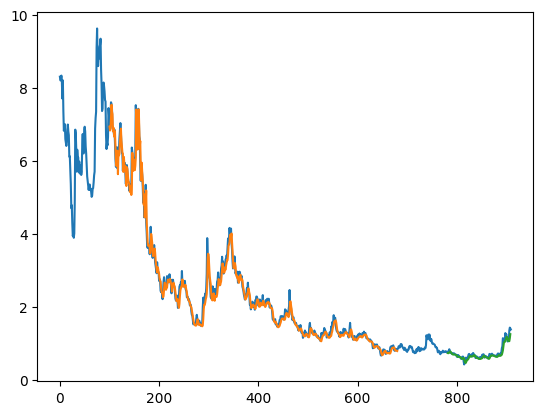

In [24]:
# Set the number of time steps (look_back) used for plotting the predictions
look_back = 100  # The number of previous time steps to use for each prediction

# Create an empty array for plotting the training predictions (same shape as the original data)
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan  # Initialize the array with NaNs to maintain the original structure

# Place the training predictions in the correct position in the array (starting after the look_back period)
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
# This ensures the training predictions align with the actual data, starting after the look_back time steps

# Create an empty array for plotting the test predictions (same shape as the original data)
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan  # Initialize with NaNs

# Place the test predictions in the correct position in the array (after the training data)
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict
# This ensures the test predictions appear right after the training data predictions

# Plot the actual stock prices (in original scale)
plt.plot(scaler.inverse_transform(df1))  # Inverse transform to get the actual prices

# Plot the training predictions
plt.plot(trainPredictPlot)  # Show how the model fits the training data

# Plot the test predictions
plt.plot(testPredictPlot)  # Show how the model performs on the test data

# Display the plot
plt.show()


In [25]:
len(test_data)

228

In [26]:
# Prepare the input data for making a prediction on the test data (using the last portion of the test dataset)
x_input = test_data[128:].reshape(1, -1)
# `test_data[128:]` slices the test data from index 128 to the end (this selects the most recent data to predict the next value)
# `.reshape(1, -1)` reshapes the data into a 2D array with 1 row and as many columns as necessary (this is required by the model)
# The reshaping ensures that the model receives input in the correct shape for a single prediction (1 sample, multiple time steps)

x_input


array([[0.02000218, 0.02271986, 0.02348082, 0.02304598, 0.0088053 ,
        0.        , 0.00467442, 0.00913143, 0.02011088, 0.01554517,
        0.01652354, 0.01630612, 0.02195891, 0.02456789, 0.03022068,
        0.03141646, 0.02565496, 0.02358952, 0.02695946, 0.02598109,
        0.03032938, 0.02543754, 0.02793782, 0.03424285, 0.03185129,
        0.02630721, 0.02837265, 0.02380693, 0.01924122, 0.02141537,
        0.02424176, 0.02228503, 0.01978476, 0.01826285, 0.01739319,
        0.02108925, 0.01837156, 0.01945864, 0.02239374, 0.02108925,
        0.02098054, 0.02815523, 0.02935101, 0.02924231, 0.03043809,
        0.02598109, 0.02043701, 0.02576367, 0.02456789, 0.02261115,
        0.02348082, 0.02152408, 0.01869768, 0.01837156, 0.01913251,
        0.02543754, 0.03141646, 0.03022068, 0.02967714, 0.02978585,
        0.02663333, 0.03206871, 0.03000326, 0.02826394, 0.02739428,
        0.02598109, 0.02652462, 0.02674204, 0.02522013, 0.02424176,
        0.02598109, 0.02674204, 0.03022068, 0.03

In [27]:
# Convert `x_input` from a NumPy array to a Python list for easier manipulation
temp_input = list(x_input)  # Converts `x_input` (which is a 2D array) into a list of lists
temp_input = temp_input[0].tolist()  # Access the first (and only) sublist, then convert it to a flat list

# `temp_input` is now a flat list of values that can be used for iterative prediction
temp_input


[0.020002176065241732,
 0.022719860213466926,
 0.02348081566265204,
 0.023045984903041987,
 0.008805301823825697,
 0.0,
 0.004674419326735367,
 0.009131426513400764,
 0.020110882135276724,
 0.015545168878576342,
 0.01652353646783143,
 0.01630611784829135,
 0.021958911243751912,
 0.024567889321942114,
 0.03022067623793257,
 0.03141645596725764,
 0.02565496298123219,
 0.02358952173268703,
 0.026959455260062347,
 0.025981087670807264,
 0.030329382307967563,
 0.025437544361692106,
 0.02793781636984733,
 0.03424285266498792,
 0.03185128672686769,
 0.02630720588091221,
 0.028372647129457383,
 0.023806933872757,
 0.01924122061605662,
 0.02141536793463677,
 0.024241764632367054,
 0.022285029453856874,
 0.01978475744570165,
 0.018262853026801522,
 0.017393191507581417,
 0.021089249724531807,
 0.018371559096836514,
 0.0194586392355967,
 0.02239373552389185,
 0.021089249724531807,
 0.02098054365449683,
 0.028155234989387413,
 0.029351014718712466,
 0.02924230864867749,
 0.03043808837800254,
 0.02

In [28]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)  # Enables eager execution for debugging purposes

# Initialize an empty list to store the predicted outputs
first_output = []

# Define the number of steps (time steps) and a counter for the loop
n_steps = 100  # Number of previous time steps used as input
i = 0  # Loop counter to keep track of days predicted

# Loop to predict the next 30 days of stock prices
while i < 30:
    if len(temp_input) > 100:  # If `temp_input` has more than 100 elements
        # Prepare the input for prediction by taking the last 100 values
        x_input = np.array(temp_input[1:])  # Remove the first element to keep length at 100
        print(f'{i} day input: {x_input}')

        # Reshape `x_input` to match LSTM input requirements: (samples, time steps, features)
        x_input = x_input.reshape(1, n_steps, 1)
        print("shape of x_input:", x_input.shape)

        # Convert to a TensorFlow tensor (explicitly specifying `dtype` as float32)
        x_input = tf.convert_to_tensor(x_input, dtype=tf.float32)

        # Predict the next day's price
        y_pred = model.predict(x_input, verbose=0)
        print(f'{i} day_output: {y_pred}')

        # Append prediction to `temp_input` and `first_output`
        temp_input.extend(y_pred[0].tolist())  # Add the new prediction to `temp_input`
        temp_input = temp_input[1:]  # Maintain length at 100 by removing the first element
        first_output.extend(y_pred.tolist())  # Store the prediction in `first_output`

        i = i + 1  # Increment the day counter

    else:
        # If `temp_input` has fewer than 100 elements, pad it with zeros to match `n_steps`
        x_input = np.array(temp_input)
        x_input = np.pad(x_input, (0, n_steps - len(x_input)), 'constant')  # Pad to length 100
        x_input = x_input.reshape(1, n_steps, 1)

        print("shape of x_input(padded):", x_input.shape)

        # Convert to tensor
        x_input = tf.convert_to_tensor(x_input, dtype=tf.float32)

        # Predict the next day's price
        y_pred = model.predict(x_input, verbose=0)
        print(f'{i} day_output: {y_pred}')

        # Append prediction to both `temp_input` and `first_output`
        temp_input.extend(y_pred[0].tolist())
        first_output.extend(y_pred.tolist())

        i = i + 1  # Increment the day counter


shape of x_input(padded): (1, 100, 1)


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


0 day_output: [[0.10054746]]
1 day input: [0.02271986 0.02348082 0.02304598 0.0088053  0.         0.00467442
 0.00913143 0.02011088 0.01554517 0.01652354 0.01630612 0.02195891
 0.02456789 0.03022068 0.03141646 0.02565496 0.02358952 0.02695946
 0.02598109 0.03032938 0.02543754 0.02793782 0.03424285 0.03185129
 0.02630721 0.02837265 0.02380693 0.01924122 0.02141537 0.02424176
 0.02228503 0.01978476 0.01826285 0.01739319 0.02108925 0.01837156
 0.01945864 0.02239374 0.02108925 0.02098054 0.02815523 0.02935101
 0.02924231 0.03043809 0.02598109 0.02043701 0.02576367 0.02456789
 0.02261115 0.02348082 0.02152408 0.01869768 0.01837156 0.01913251
 0.02543754 0.03141646 0.03022068 0.02967714 0.02978585 0.02663333
 0.03206871 0.03000326 0.02826394 0.02739428 0.02598109 0.02652462
 0.02674204 0.02522013 0.02424176 0.02598109 0.02674204 0.03022068
 0.03250354 0.03250354 0.02880748 0.02598109 0.02945972 0.03304707
 0.03163387 0.03685183 0.04880965 0.05424503 0.07816067 0.0770736
 0.06728992 0.0738123

In [29]:
# Create an array representing the past 100 days
day_new = np.arange(1, 101)
# `np.arange(1, 101)` generates an array of integers from 1 to 100
# This array can be used as the x-axis to represent the last 100 days of actual data

# Create an array representing the next 30 days
day_pred = np.arange(101, 131)
# `np.arange(101, 131)` generates an array of integers from 101 to 130
# This array can be used as the x-axis to represent the next 30 days of predicted values


In [30]:
len(df1)

910

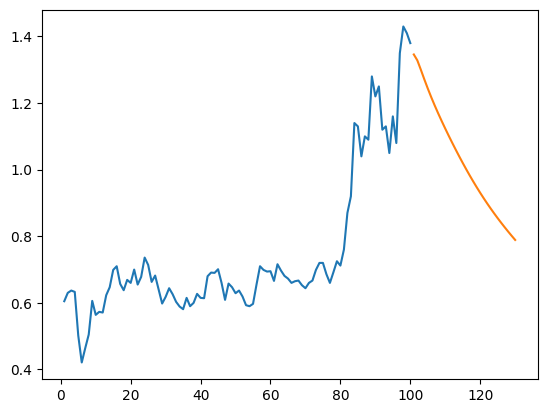

In [31]:
# Plot the last 100 days of actual stock prices
plt.plot(day_new, scaler.inverse_transform(df1[810:]))
# `df1[810:]` selects the last 100 days of the actual data
# `scaler.inverse_transform` is used to revert the normalized values back to original stock prices for accurate visualization

# Plot the next 30 days of predicted stock prices
plt.plot(day_pred, scaler.inverse_transform(first_output))
# `first_output` contains the predicted values for the next 30 days
# `scaler.inverse_transform` converts the normalized predictions back to the original scale

# Display the plot
plt.show()


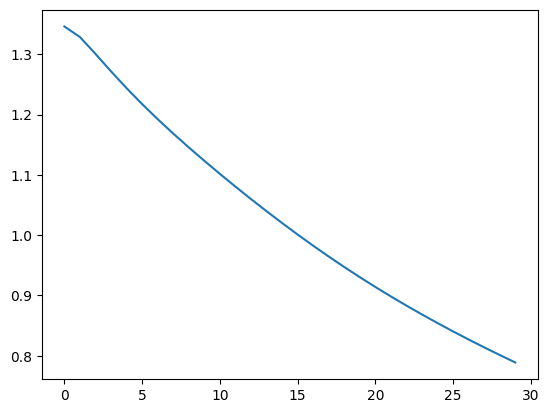

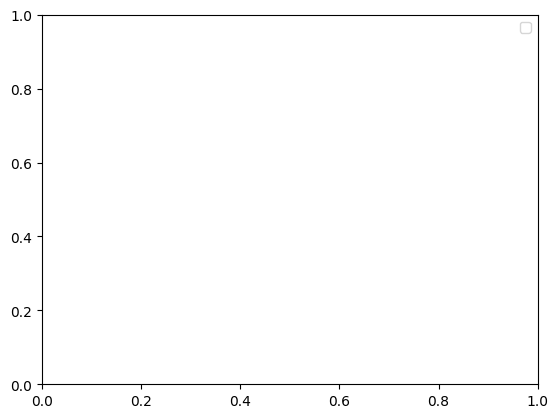

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'first_output_transformed' and 'day_new' are already defined
first_output_transformed = scaler.inverse_transform(np.array(first_output).reshape(-1, 1)).flatten()

# Generate x-axis values with the same length as first_output_transformed
day_pred = list(range(len(first_output_transformed)))

# Plot the data
plt.plot(day_pred, first_output_transformed, label='Predicted Data') # Changed day_new to day_pred
plt.show()
plt.legend()

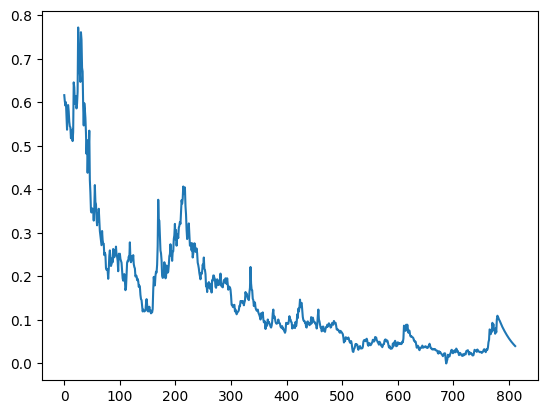

In [33]:
# Convert `df1` to a list to prepare for appending predictions
df3 = df1.tolist()  # `df1.tolist()` converts the normalized actual stock prices into a list for easier manipulation

# Append the 30-day predictions to the end of the actual stock prices
df3.extend(first_output)  # `extend` directly appends all elements of `first_output` to `df3`

# Plot the combined actual and predicted data starting from the 128th day
plt.plot(df3[128:])  # `df3[128:]` slices the list from index 128 onward for a smoother transition between actual and predicted data

# Display the plot
plt.show()
